# PyTorch Basics

In this course we will be using open-source Python deep-learning library called PyTorch. It can be used for two different things: 
* Replacing NumPy-like operations with GPU-accelerated operations
* Building deep neural networks

PyTorch is popular as it is quite easy to use. Pytorch uses dynamic computation, which allows greater flexibility in building complext arcitectures. 

You can get a pretty good overview from those two books: 

1. [PyTorch Recipes A Problem-Solution Approach by Pradeepta Mishra](https://www.oreilly.com/library/view/pytorch-recipes-a/9781484242582/)
2. [Deep Learning with PyTorch A practical approach to building neural network models using PyTorch by Vishnu Subramanian](https://www.amazon.com/Deep-Learning-PyTorch-practical-approach-ebook/dp/B078THDX3J)
## Tensors

At the core of the library is the tensor, which is a mathematical object holding some multidimensional data. A tensor of order zero is just a number or a scalar. A tensor of order one is an array of numbers or a vector. Similarly, a 2nd-order tensor is any array of vectors, or a matrx.

<img src="https://lh3.googleusercontent.com/pw/ACtC-3dgV3eW8Ua1-pqoDrIY584g6vUqdshdedf8JEUWgtqgEx7dfm5fclYlGqzF5RX3ldCEuFP996EXd0k7cNPZpbr8VdZZMItVDPj60fV8Edz9i2iOMQ3Xr7Ah4l8XcnoIc0i_gyoV9RL5lhbaCMnrjhn3_g=w813-h283-no?authuser=0" >

You can read about different tensor operations [here](https://pytorch.org/docs/stable/torch.html#tensor-creation-ops). 

In [1]:
import torch
import torch.nn as nn
import numpy as np


def describe(x): 
  print("Type: {}".format(x.type()))
  print("Shape/size: {}".format(x.size()))
  print("Values: \n{}".format(x))

There are multiple ways of initializing tensors. First, we can create a tensor from a list: 

In [ ]:
random_tensor = torch.tensor([2,3,4])
describe(random_tensor)

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([2, 3, 4])


Or we can randomly initialize it with values from a uniform distribution on the interval [0,1) or the standard normal distribution. 

In [ ]:
random_uniform = torch.rand(2,3)
random_normal = torch.randn(2,3)
describe(random_uniform)
describe(random_normal)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.5173, 0.5643, 0.2244],
        [0.9338, 0.0426, 0.6800]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 1.3073,  0.0671, -0.8754],
        [ 0.0386, -0.7225, -0.4477]])


We can also create tensors all filled with the same scalar.

In [ ]:
x = torch.zeros(2,3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


We can also create tensors from NumPy arrays.

In [ ]:
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.4708, 0.6415, 0.1301],
        [0.3058, 0.3595, 0.9019]], dtype=torch.float64)


As we saw from the output of the describe function, each tensor has a type and size. The default type when you use the torch.Tensor constructor is torch.FloatTensor. You can convert a tensor to a different type by specifying it in at initialization or later on. You need to specify it with by providing dtype.

In [ ]:
x = torch.tensor([1,2,3], dtype=torch.int32)
describe(x)

Type: torch.IntTensor
Shape/size: torch.Size([3])
Values: 
tensor([1, 2, 3], dtype=torch.int32)


You can now operate on tensors using traditional operators like +, -, * etc or functions like .add().



In [ ]:
x = torch.rand(2,3)
y = torch.rand(2,3)
describe(x+y)
describe(torch.add(x,y))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.1815, 1.2577, 1.1170],
        [1.2105, 0.5809, 0.6621]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.1815, 1.2577, 1.1170],
        [1.2105, 0.5809, 0.6621]])


### Slicing and indexing

A common thing to do with a tensor is to slice a portion of it. 

In [ ]:
x = torch.FloatTensor([1,2,3,4,5,6,7,8,9,10])
print(x)
print(x[:5]) # first five elements
print(x[5:]) # last fice elements
print(x[4]) # one element from specific index

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([1., 2., 3., 4., 5.])
tensor([ 6.,  7.,  8.,  9., 10.])
tensor(5.)


Most of the PyTorch tensor operations are very similar to NumPy operations. 

### Tensors on GPU

All the tensor operations can be performed either CPU or GPU. We can move any tensor to the GPU by calling the *.cuda()* function. Let's compare the performance of tensor matrix multiplication on CPU and GPU. (To use GPU on Google Colab, you need to change the runtime type to GPU from Insert->Change runtime type->GPU). 

In [2]:
%%time
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
a.matmul(b)

CPU times: user 24.5 s, sys: 488 ms, total: 24.9 s
Wall time: 25 s


In [3]:
%%time
# move the tensor to GPU
a = a.cuda()
b = b.cuda()
a.matmul(b)

CPU times: user 2.41 s, sys: 1.18 s, total: 3.59 s
Wall time: 10.8 s


### Variables

Deep learning algorithms are often represented as computation graphs. Simple example is presented below. Lets try to build this in our example to get a better understanding.

<img src="https://lh3.googleusercontent.com/pw/ACtC-3c3AregiepwMkD-eBPLBN6MliNDSk1RQlHt3Ehatjo7PVv0OzLTQpvFy8LnDZqzgGtGogqgq0O49RtHb9LgHjelnxaDMKTQrfQm_H1TPKx5KkA_UddRSk_u1VEP8eBa7TrrA2j8zQKr7qnh_glq_lIDEg=w756-h341-no?authuser=0">

A variable forms a thin wrapper around a tensor object, its gradients, and a reference to the function that created it. The following figure shows Variable class components: 
<img src="https://lh3.googleusercontent.com/PNrvIpdnCm8HPM-NTI9zvgOCy8hDG6tXax-PJcfxmePerbGMOz6QdM0EmSJ309RjOIUaJWIb-RaqXqRHrCK4zKYRmuwIsMriIsBoHkSBJGj4t6WGFbDLFPAK6PjBOJ8SOmybSZh2-VTc__HvxGTiiHXBWabmvo5iNrzrg_fBoiCix1z3-AxeFI_zdXVlkA7UkIwxQBYjzQTownyJKoX8H_lUnoFyP590OSxkIBlZ5BIh8XXyDa-o-DT6HYZpDBBTNfxgTDL3rh_6lcnamIARjQNTeLBN1EXmUry9wC5QbbKfbH-FtEYnFzzSFI0qnojOnq-fAeqQs29iQs_CZANB56c6RjUwXgAvvH9Cvu6z2p9KhSl3PACujWBnbbs9_Z5s9q3XqTnPmD2cbDyZ89mSVtMsjvAFqC0WeYqZRPOmSfJzDSMR79fN6kxqATUKyAzsX-DTKusXt4u_3-EfqNRaJT87bACTyarlh2yD-pzMaYw2V_V5oIK7HKip3ptMui_4sioE-TqgDfzxIBBua3wG2dvC95lXPGEq9a6YjcYCCAaXzQN7-AXUTb_n1xnikeOZUyAVnYfjV8BgdhnfN-W5ZkaQjTDzf1025mUmk1WEJX5stj2ONELQyp1O3JOEAxewi9r71F1cjXMJqM4eiBExaf3OGUwV-aFkM1i-W2TDqRb3u63Pu62A1b3SQqt8nw=w655-h128-no?authuser=0">

The gradients refer to the rate of the change of the loss function with respect to various parameters (W,b). For example, if the gradient of a is 2, then any change in the value of a would modify the value of Y by two times. By default, the gradients of the variables are none. 

Apart from gradients, a variable also has a reference to the function that created it, which in
turn refers to how each variable was created. For example, the variable B has information
that it is generated as a result of the product between 9 and 8. 

In [35]:
x = torch.autograd.Variable(torch.ones(2,2), requires_grad=True)
y = x.mean()

y.backward() # computing the gradients

print(x.grad)
print(x.grad_fn) # points to the function it created
print(x.data)
print(y.grad_fn) # points to the function it created

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])
None
tensor([[1., 1.],
        [1., 1.]])


**Creating data for our neural network**


In [42]:
import numpy as np 
def get_data(): 
  train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                        7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
  train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573,  3.366, 2.596, 2.53, 1.221, 
                        2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
  dtype = torch.FloatTensor
  X = torch.autograd.Variable(torch.from_numpy(train_X).type(dtype), requires_grad=False).view(17,1)
  y = torch.autograd.Variable(torch.from_numpy(train_Y).type(dtype), requires_grad=False)
  return X,y

In the example, we have two learnable parameters, w and b, and two fixed parameters x and y. We have created variables x and y, now we need w and b. Learnable parameters are created using random initialization and have the require_grad parameter set to True. 

In [43]:
def get_weights():
  w = torch.autograd.Variable(torch.randn(1), requires_grad=True)
  b = torch.autograd.Variable(torch.randn(1), requires_grad=True)
  return w, b

Now, we have defined the inputs and outputs of the model using PyTorch variables. Next, we have to build a model which learns how to map the outputs from the inputs. In our example, we implement a simple neural network which tries to map the inputs to outputs assuming a linear relationship. The linear relationship can be represented as y=wx+b, where w and b are learnable parameters. 

In [38]:
def simple_network(x):
  y_pred = torch.matmul(x,w) + b
  return y_pred

PyTorch also provides a higher-level abstraction in torch.nn called layers, which will take care of most of these underlying initialization and operations associated with most of the common techniques available in the neural network. 
The previous model can be represented as follows: 

f = nn.Linear(17,1) 

Now, we need a loss function to know how good our model is. 
As we start with random learnable parameters w and b, results in y_pred will not be close to the actual y. Since we are dealing with regression, we use a loss function called sum of squared error (SSE). 

In [45]:
def loss_fn(y, y_pred): 
  loss = (y_pred-y).pow(2).sum()
  for param in [w,b]:
    if not param.grad is None: param.grad.data.zero_()
  loss.backward()
  return loss.data

In this loss function we also calculate the gradients of our learnable parameters w and b. As we will use the loss function more than once, we remove any previously calculated gradients by calling the grad.data.zero_() operation. First time we call backward function, the gradients are empty, so we zero them when they are not None. 

Now, we need to optimize our neural network. Once the loss is calculated, we optimize the values with the calculate gradients so that the loss reduces, which is implemented in the following function: 


In [40]:
def optimize(learning_rate):
  w.data -= learning_rate * w.grad.data 
  b.data -= learning_rate * b.grad.data

The learning rate is a hyper-parameter, which allows us to adjust the values in the variables by a small amount of the gradients, where the gradients denote the direction in which each variable (w and b) needs to be adjusted. 
torch.optim package has already implemented many different optimizers like Adam, RmsProp and SGD. 

In [68]:
x, y = get_data()
w,b = get_weights()
preds = simple_network(x)
loss = loss_fn(y, preds)
optimize(0.002)

In [69]:
losses = []
for i in range(200):
  preds = simple_network(x)
  loss = loss_fn(y, preds)
  losses.append(loss)
  optimize(0.0002)

Text(0, 0.5, 'loss')

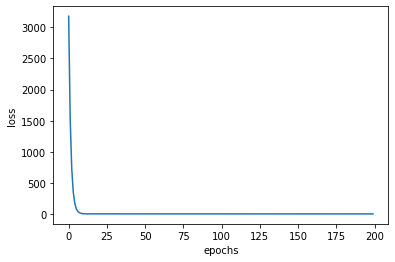

In [73]:
import  matplotlib.pyplot as plt 
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'y')

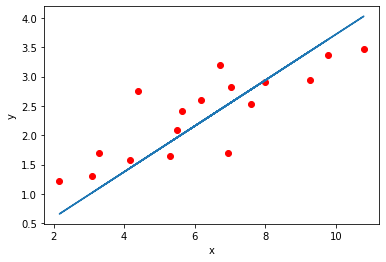

In [76]:
predictions = preds.detach().numpy()
plt.scatter(x, y, color="red")
plt.plot(x, predictions)
plt.xlabel("x")
plt.ylabel("y")